<a href="https://colab.research.google.com/github/SeathWR/Proyectos_hobby/blob/main/Proyecto_NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

##Preguntas objetivo

-como se han ganado mas partidos, en casa o de visitante

-que equipos han hecho la ,mayor cantidad de puntos tanto en casa como de visitante

-cuantos partidos han ganado los distintos equipos estando en casa o visitante

-como se ha comportado los puntos anotados a lo largo de los años

-contra cuales equipos han ganado mas estando en casa

In [ ]:
games = pd.read_csv('/content/games.csv')
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

In [ ]:
#subconjunto de datos

games = games[['GAME_DATE_EST','GAME_ID','GAME_STATUS_TEXT','TEAM_ID_home','TEAM_ID_away','PTS_home','PTS_away','HOME_TEAM_WINS']]
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0


In [ ]:
#cambio de la columna a tipo fecha
games['GAME_DATE_EST'] = pd.to_datetime(games['GAME_DATE_EST'])

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   GAME_DATE_EST     26651 non-null  datetime64[ns]
 1   GAME_ID           26651 non-null  int64         
 2   GAME_STATUS_TEXT  26651 non-null  object        
 3   TEAM_ID_home      26651 non-null  int64         
 4   TEAM_ID_away      26651 non-null  int64         
 5   PTS_home          26552 non-null  float64       
 6   PTS_away          26552 non-null  float64       
 7   HOME_TEAM_WINS    26651 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 1.6+ MB


In [ ]:
#nueva columna que almacene solo el año en que se jugo el partido}
games['YEAR'] = games['GAME_DATE_EST'].dt.year
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,YEAR
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1,2022
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1,2022
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1,2022
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0,2022


In [ ]:
#conjunto teams
teams = pd.read_csv('/content/teams.csv')
teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [ ]:
#elejimos solo las columnas a utilizar
teams = teams[['TEAM_ID','CITY','NICKNAME']]
teams.head()

,TEAM_ID,CITY,NICKNAME
0,1610612737,Atlanta,Hawks
1,1610612738,Boston,Celtics
2,1610612740,New Orleans,Pelicans
3,1610612741,Chicago,Bulls
4,1610612742,Dallas,Mavericks


##inner cruza la informacion que coincide en ambos conjuntos

In [ ]:
#combinamos los conjutos de datos
home_games = pd.merge(games,teams,left_on='TEAM_ID_home',right_on='TEAM_ID', how='inner')
home_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,YEAR,TEAM_ID,CITY,NICKNAME
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans
1,2022-12-19,22200457,Final,1610612740,1610612749,119.0,128.0,0,2022,1610612740,New Orleans,Pelicans
2,2022-12-11,22200395,Final,1610612740,1610612756,129.0,124.0,1,2022,1610612740,New Orleans,Pelicans
3,2022-12-09,22200384,Final,1610612740,1610612756,128.0,117.0,1,2022,1610612740,New Orleans,Pelicans
4,2022-12-07,22200371,Final,1610612740,1610612765,104.0,98.0,1,2022,1610612740,New Orleans,Pelicans


In [ ]:
#renombramos para diferenciar
home_games = home_games.rename(columns={'CITY':'CITY_HOME','NICKNAME':'NICKNAME_HOME'})
home_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,YEAR,TEAM_ID,CITY_HOME,NICKNAME_HOME
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans
1,2022-12-19,22200457,Final,1610612740,1610612749,119.0,128.0,0,2022,1610612740,New Orleans,Pelicans
2,2022-12-11,22200395,Final,1610612740,1610612756,129.0,124.0,1,2022,1610612740,New Orleans,Pelicans
3,2022-12-09,22200384,Final,1610612740,1610612756,128.0,117.0,1,2022,1610612740,New Orleans,Pelicans
4,2022-12-07,22200371,Final,1610612740,1610612765,104.0,98.0,1,2022,1610612740,New Orleans,Pelicans


In [ ]:
#se combina el nuevo conjunto de datos
both_games = pd.merge(home_games,teams,left_on='TEAM_ID_away',right_on='TEAM_ID', how='inner')
both_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,YEAR,TEAM_ID_x,CITY_HOME,NICKNAME_HOME,TEAM_ID_y,CITY,NICKNAME
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
1,2022-04-13,52100131,Final,1610612740,1610612759,113.0,103.0,1,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
2,2022-03-26,22101107,Final,1610612740,1610612759,103.0,107.0,0,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
3,2022-02-12,22100848,Final,1610612740,1610612759,114.0,124.0,0,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
4,2021-04-24,22000264,Final,1610612740,1610612759,108.0,110.0,0,2021,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs


In [ ]:
both_games = both_games.rename(columns={'CITY':'CITY_AWAY','NICKNAME':'NICKNAME_AWAY'})
both_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,YEAR,TEAM_ID_x,CITY_HOME,NICKNAME_HOME,TEAM_ID_y,CITY_AWAY,NICKNAME_AWAY
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
1,2022-04-13,52100131,Final,1610612740,1610612759,113.0,103.0,1,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
2,2022-03-26,22101107,Final,1610612740,1610612759,103.0,107.0,0,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
3,2022-02-12,22100848,Final,1610612740,1610612759,114.0,124.0,0,2022,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs
4,2021-04-24,22000264,Final,1610612740,1610612759,108.0,110.0,0,2021,1610612740,New Orleans,Pelicans,1610612759,San Antonio,Spurs


In [ ]:
#eliminar columnas que estan haciendo ruido
both_games = both_games.drop(columns=['TEAM_ID_home','TEAM_ID_away','TEAM_ID_x','TEAM_ID_y'])
both_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,PTS_home,PTS_away,HOME_TEAM_WINS,YEAR,CITY_HOME,NICKNAME_HOME,CITY_AWAY,NICKNAME_AWAY
0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs
1,2022-04-13,52100131,Final,113.0,103.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs
2,2022-03-26,22101107,Final,103.0,107.0,0,2022,New Orleans,Pelicans,San Antonio,Spurs
3,2022-02-12,22100848,Final,114.0,124.0,0,2022,New Orleans,Pelicans,San Antonio,Spurs
4,2021-04-24,22000264,Final,108.0,110.0,0,2021,New Orleans,Pelicans,San Antonio,Spurs


In [ ]:
games = both_games.copy()
#cambio de nombres a columnas de mayuscula a minuscula
games.columns = games.columns.str.lower()
games.head()

,game_date_est,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,city_home,nickname_home,city_away,nickname_away
0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs
1,2022-04-13,52100131,Final,113.0,103.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs
2,2022-03-26,22101107,Final,103.0,107.0,0,2022,New Orleans,Pelicans,San Antonio,Spurs
3,2022-02-12,22100848,Final,114.0,124.0,0,2022,New Orleans,Pelicans,San Antonio,Spurs
4,2021-04-24,22000264,Final,108.0,110.0,0,2021,New Orleans,Pelicans,San Antonio,Spurs


In [ ]:
#nueva columna con los puntos totales por partido
games['total_points'] = games['pts_home'] + games['pts_away']
games.head()

,game_date_est,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,city_home,nickname_home,city_away,nickname_away,total_points
0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs,243.0
1,2022-04-13,52100131,Final,113.0,103.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs,216.0
2,2022-03-26,22101107,Final,103.0,107.0,0,2022,New Orleans,Pelicans,San Antonio,Spurs,210.0
3,2022-02-12,22100848,Final,114.0,124.0,0,2022,New Orleans,Pelicans,San Antonio,Spurs,238.0
4,2021-04-24,22000264,Final,108.0,110.0,0,2021,New Orleans,Pelicans,San Antonio,Spurs,218.0


In [ ]:
#informacion de los partidos con mas puntos
games.nlargest(n=10, columns='total_points')

,game_date_est,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,city_home,nickname_home,city_away,nickname_away,total_points
8301,2019-03-01,21800928,Final,161.0,168.0,0,2019,Atlanta,Hawks,Chicago,Bulls,329.0
1994,2006-12-07,20600271,Final,157.0,161.0,0,2006,Brooklyn,Nets,Phoenix,Suns,318.0
10704,2019-10-30,21900061,Final,158.0,159.0,0,2019,Washington,Wizards,Houston,Rockets,317.0
835,2022-02-25,22100899,Final,153.0,157.0,0,2022,Washington,Wizards,San Antonio,Spurs,310.0
10577,2020-07-31,21901238,Final,149.0,153.0,0,2020,Dallas,Mavericks,Houston,Rockets,302.0
5829,2006-01-22,20500589,Final,149.0,152.0,0,2006,Phoenix,Suns,Oklahoma City,Thunder,301.0
6008,2019-01-10,21800619,Final,154.0,147.0,1,2019,San Antonio,Spurs,Oklahoma City,Thunder,301.0
3895,2008-04-06,20701151,Final,151.0,147.0,1,2008,Oklahoma City,Thunder,Denver,Nuggets,298.0
2977,2006-12-27,20600420,Final,151.0,145.0,1,2006,New York,Knicks,Detroit,Pistons,296.0
2621,2018-12-22,21800480,Final,149.0,146.0,1,2018,Washington,Wizards,Phoenix,Suns,295.0


In [ ]:
#partidos con menos puntos
games.nsmallest(n=10, columns='total_points')

,game_date_est,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,city_home,nickname_home,city_away,nickname_away,total_points
23366,2007-10-19,10700072,Final,36.0,33.0,1,2007,Boston,Celtics,Brooklyn,Nets,69.0
8684,2003-10-08,10300012,Final,62.0,58.0,1,2003,Indiana,Pacers,Chicago,Bulls,120.0
10973,2004-11-09,20400049,Final,64.0,60.0,1,2004,Brooklyn,Nets,Portland,Trail Blazers,124.0
12987,2005-03-13,20400927,Final,64.0,62.0,1,2005,Detroit,Pistons,Utah,Jazz,126.0
4857,2003-11-01,20300031,Final,73.0,56.0,1,2003,Minnesota,Timberwolves,Toronto,Raptors,129.0
4105,2003-11-04,20300048,Final,71.0,60.0,1,2003,Indiana,Pacers,Denver,Nuggets,131.0
11501,2004-10-22,10400065,Final,69.0,63.0,1,2004,Charlotte,Hornets,Portland,Trail Blazers,132.0
16870,2005-10-24,10500089,Final,65.0,67.0,0,2005,Memphis,Grizzlies,Orlando,Magic,132.0
10188,2014-11-16,21400144,Final,65.0,69.0,0,2014,Oklahoma City,Thunder,Houston,Rockets,134.0
19181,2004-06-01,40300306,Final,69.0,65.0,1,2004,Detroit,Pistons,Indiana,Pacers,134.0


#Graficos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#partidos ganados en casa y de visitante
total = games['home_team_wins'].value_counts()
total

,count
home_team_wins,
1,15645
0,11006


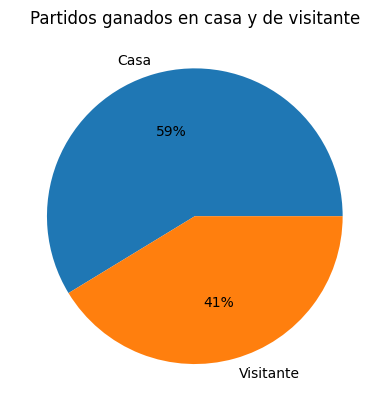

In [ ]:
#grafico pastel
plt.pie(total.values, labels=['Casa','Visitante'], autopct='%.0f%%') #codigo para agregar el porcentaje al grafico
plt.title('Partidos ganados en casa y de visitante')
plt.show()

In [ ]:
#rendimiento de equipo jugando de local y de visitante por cantidad de puntos
home_wins = games[games['home_team_wins']== 1]
result = home_wins.groupby('nickname_home')['pts_home'].aggregate(np.mean).reset_index().sort_values('pts_home')

<ipython-input-22-73d8a9e7479f>:3: FutureWarning: The provided callable <function mean at 0x7de5e6538310> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  result = home_wins.groupby('nickname_home')['pts_home'].aggregate(np.mean).reset_index().sort_values('pts_home')


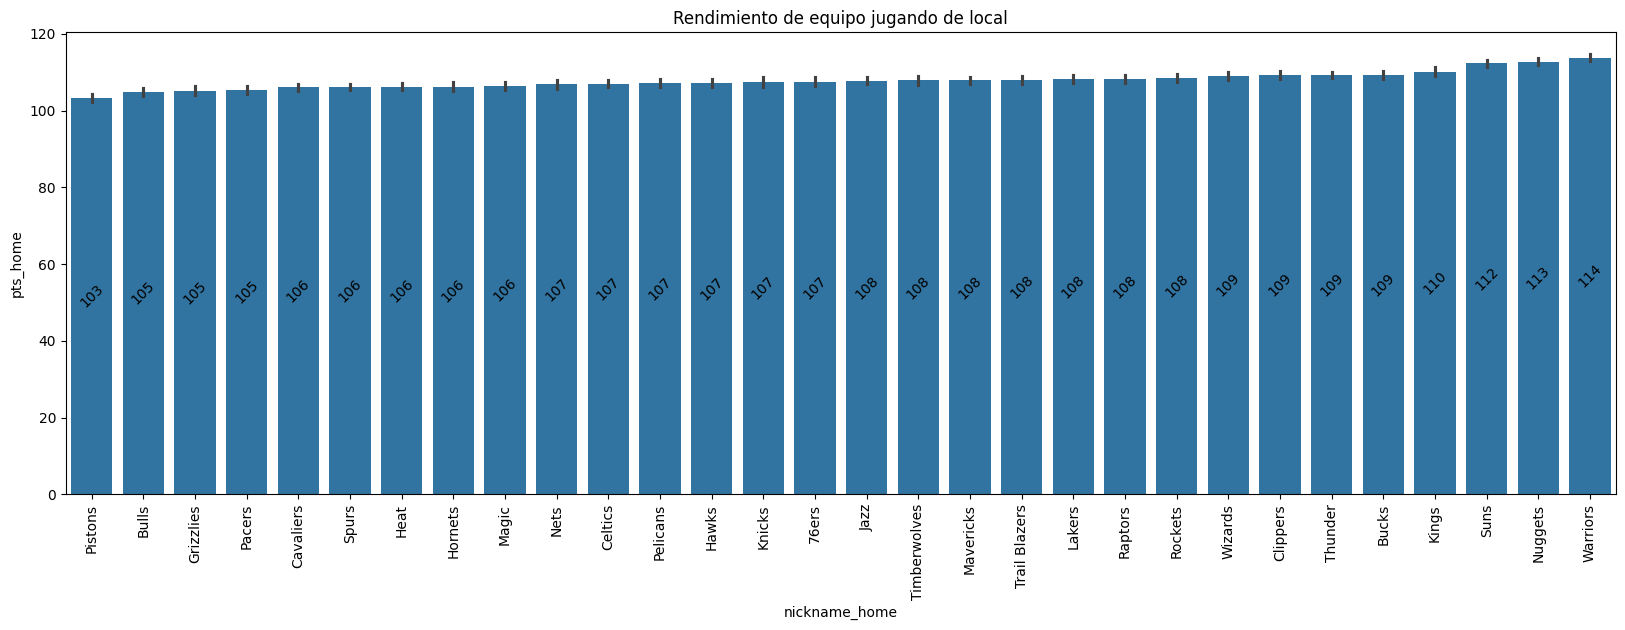

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.barplot(data=home_wins, x='nickname_home', y='pts_home', order=result['nickname_home'])
plt.xticks(rotation=90)            #rotar las etiquetas
plt.title('Rendimiento de equipo jugando de local')
ax.bar_label(ax.containers[-1], fmt='%.0f',label_type='center',rotation=45)
plt.show()


In [ ]:
away_wins = games[games['home_team_wins']== 0]
result = away_wins.groupby('nickname_away')['pts_away'].aggregate(np.mean).reset_index().sort_values('pts_away')

<ipython-input-26-60636020a45a>:2: FutureWarning: The provided callable <function mean at 0x7de5e6538310> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  result = away_wins.groupby('nickname_away')['pts_away'].aggregate(np.mean).reset_index().sort_values('pts_away')


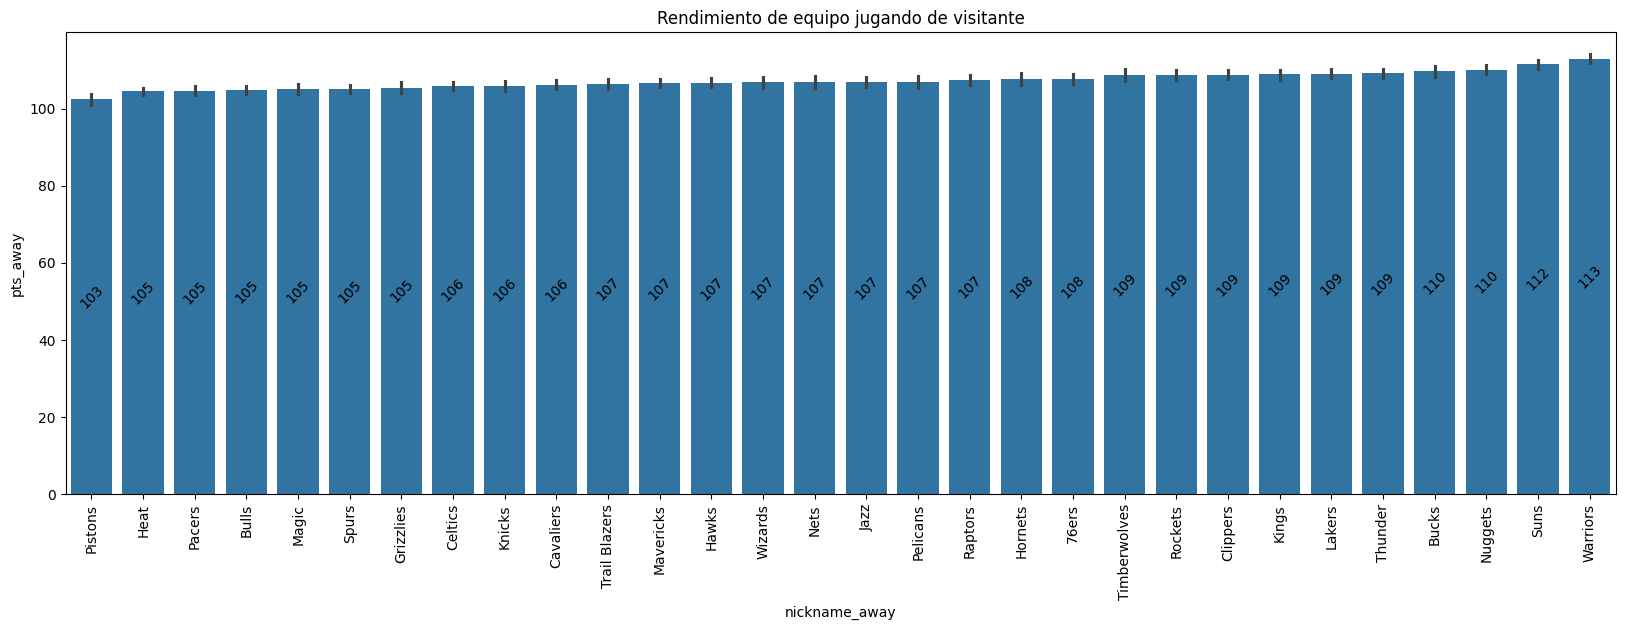

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.barplot(data=away_wins, x='nickname_away', y='pts_away', order=result['nickname_away'])
plt.xticks(rotation=90)            #rotar las etiquetas
plt.title('Rendimiento de equipo jugando de visitante')
ax.bar_label(ax.containers[-1], fmt='%.0f',label_type='center',rotation=45)
plt.show()

<Axes: xlabel='total_points', ylabel='Count'>

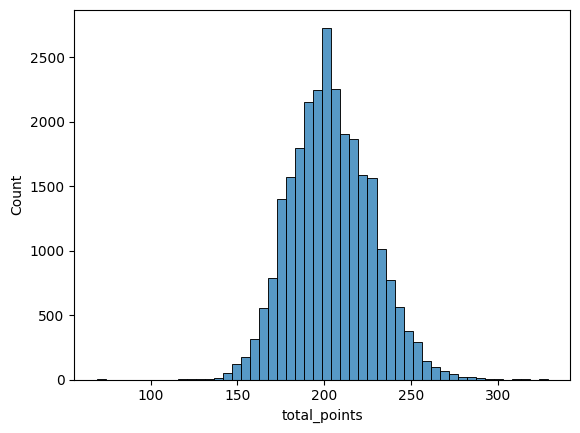

In [ ]:
#histograma
sns.histplot(data=games, x='total_points', bins=50) #bins para visualizar mejor las columnas

<Axes: xlabel='total_points'>

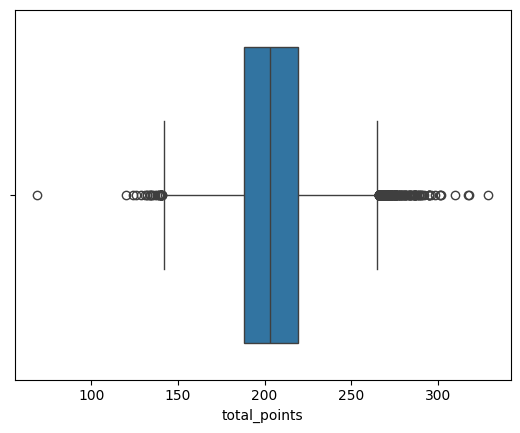

In [ ]:
sns.boxplot(x=games['total_points'])

#conteo total de partidos ganados

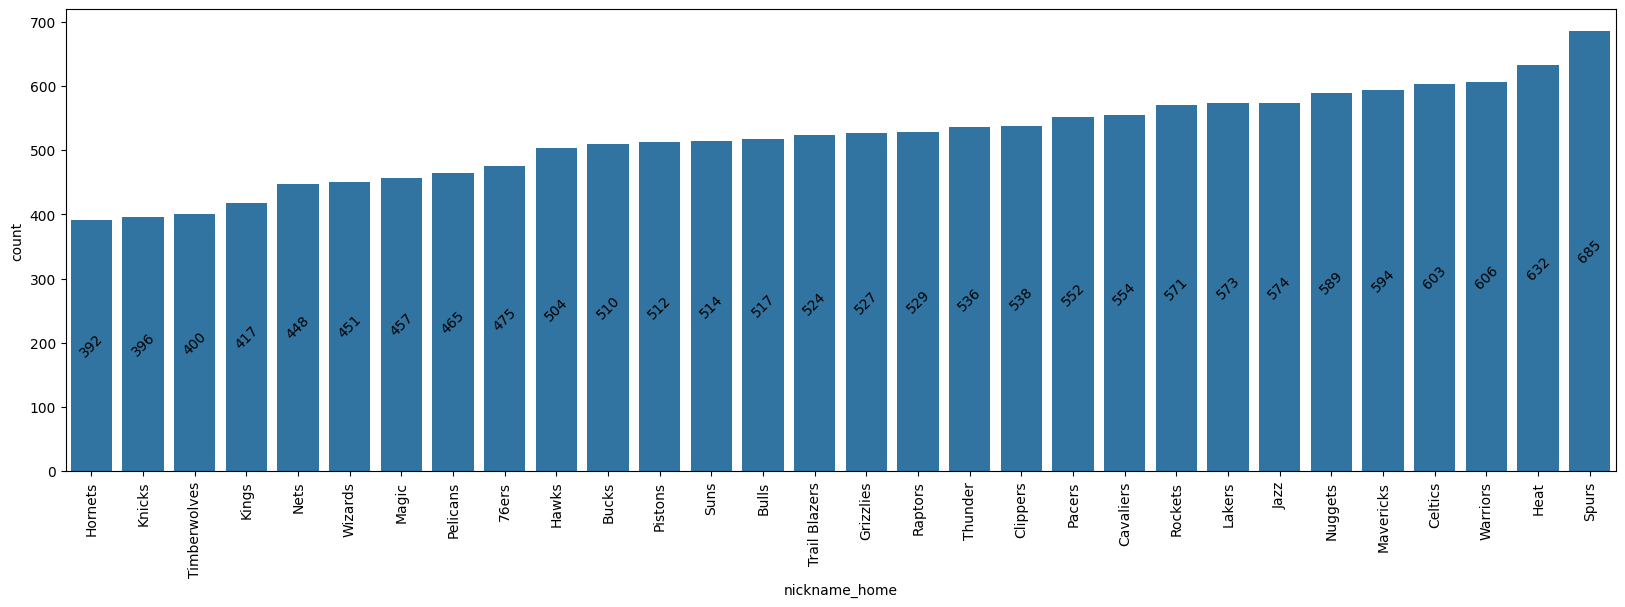

In [ ]:
plt.figure(figsize=(20,6))
result = home_wins['nickname_home'].value_counts().sort_values()

ax = sns.countplot(x='nickname_home', data=home_wins, order=result.index)
ax.bar_label(ax.containers[-1], fmt='%.0f',label_type='center',rotation=45)

plt.xticks(rotation=90)
plt.show()

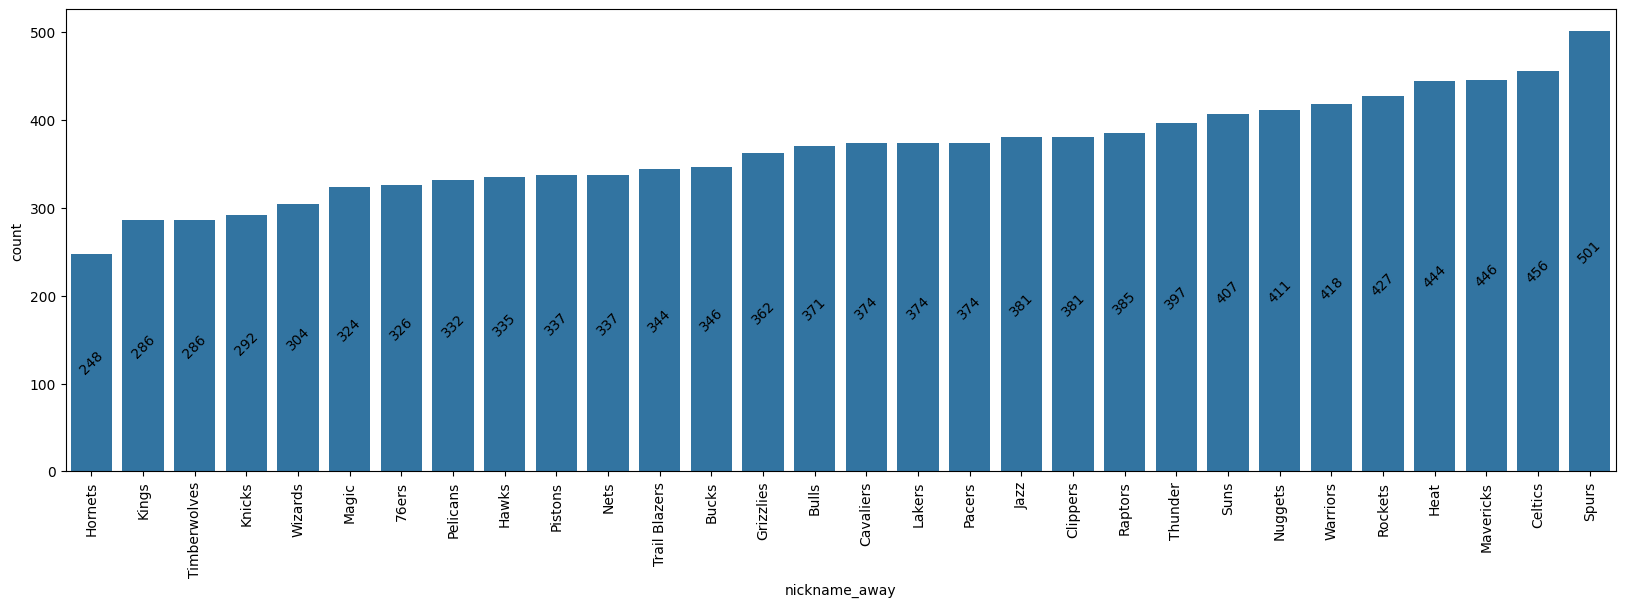

In [ ]:
plt.figure(figsize=(20,6))
result = away_wins['nickname_away'].value_counts().sort_values()

ax = sns.countplot(x='nickname_away', data=away_wins, order=result.index)
ax.bar_label(ax.containers[-1], fmt='%.0f',label_type='center',rotation=45)

plt.xticks(rotation=90)
plt.show()

In [ ]:
#para hacer el conteo de puntos por año hay que agrupar primero
games.groupby('year')['total_points'].mean()

,total_points
year,
2003,184.475269
2004,188.379151
2005,193.944251
2006,195.553411
2007,196.871795
2008,198.470180
2009,200.169468
2010,199.734637
2011,197.679781


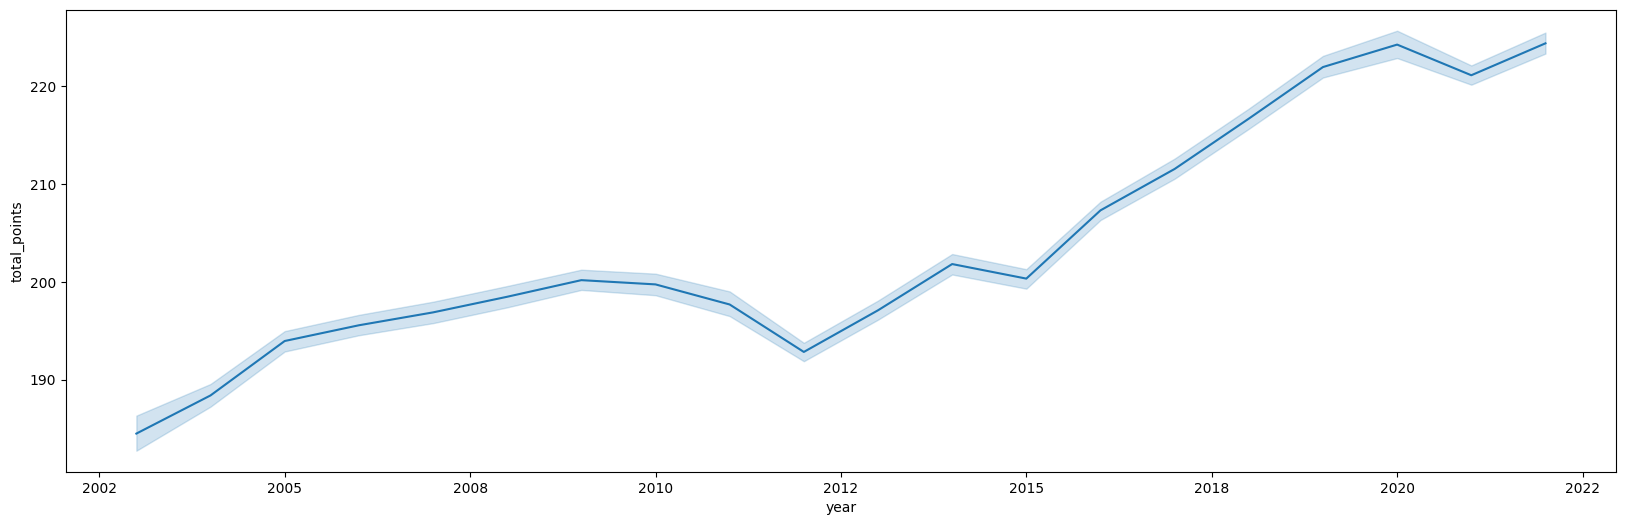

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.lineplot(data=games, x='year', y='total_points')
def format_xlabels(value, pos):
  return str(int(round(value)))

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_xlabels))  #esta funcion es para mejorar la visualizacion del eje x para que se ven como valores enteros
plt.show()

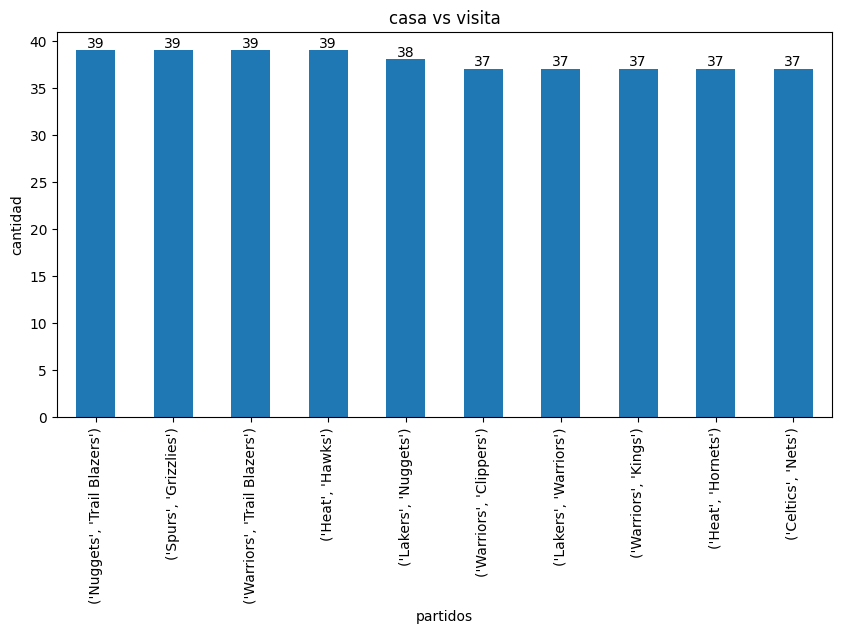

In [ ]:
x = home_wins[['nickname_home','nickname_away']].value_counts()

ax = x[:10].plot(kind='bar', figsize=[10,5])
ax.set_title('casa vs visita')
ax.set_xlabel('partidos')
ax.set_ylabel('cantidad')
ax.set_xticklabels(x.index[:10], rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.show()
#

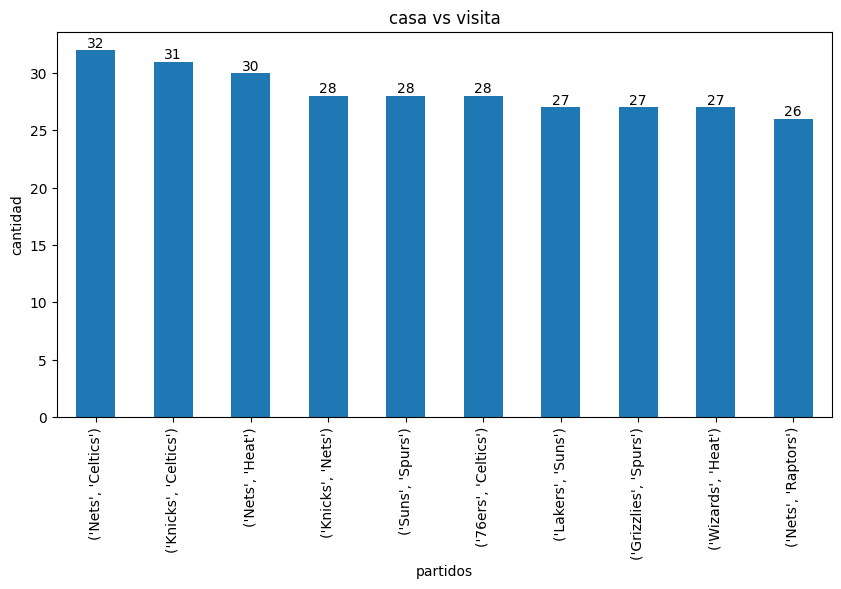

In [ ]:
x = away_wins[['nickname_home','nickname_away']].value_counts()

ax = x[:10].plot(kind='bar', figsize=[10,5])
ax.set_title('casa vs visita')
ax.set_xlabel('partidos')
ax.set_ylabel('cantidad')
ax.set_xticklabels(x.index[:10], rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.show()

In [ ]:
game_details = pd.read_csv('/content/games_details.csv')
game_details.head()

<ipython-input-53-bdc718e2c00b>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  game_details = pd.read_csv('/content/games_details.csv')


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


In [ ]:
game_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668628 entries, 0 to 668627
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   GAME_ID      668628 non-null  int64  
 1   PLAYER_NAME  668628 non-null  object 
 2   PTS          558938 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 15.3+ MB


In [ ]:
#subconjunto para dejar solamente las columnas a utilizar
game_details = game_details[['GAME_ID','PLAYER_NAME','PTS']]
game_details.head()

,GAME_ID,PLAYER_NAME,PTS
0,22200477,Romeo Langford,2.0
1,22200477,Jeremy Sochan,23.0
2,22200477,Jakob Poeltl,13.0
3,22200477,Devin Vassell,10.0
4,22200477,Tre Jones,19.0


#juntar ambas tablas

In [ ]:
games_complete = pd.merge(game_details, games, left_on='GAME_ID', right_on='game_id', how='inner') #unimos las dos tablas por inner con el id
games_complete.head()

,GAME_ID,PLAYER_NAME,PTS,game_date_est,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,city_home,nickname_home,city_away,nickname_away,total_points
0,22200477,Romeo Langford,2.0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs,243.0
1,22200477,Jeremy Sochan,23.0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs,243.0
2,22200477,Jakob Poeltl,13.0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs,243.0
3,22200477,Devin Vassell,10.0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs,243.0
4,22200477,Tre Jones,19.0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs,243.0


In [ ]:
player_pts = games_complete.groupby(['year','PLAYER_NAME'])['PTS'].mean().reset_index().sort_values('year')
player_pts.head(10)

,year,PLAYER_NAME,PTS
0,2003,A.J. Guyton,4.000000
307,2003,Nazr Mohammed,6.382353
306,2003,Morris Peterson,7.032258
305,2003,Moochie Norris,2.843750
304,2003,Monty Williams,2.000000
303,2003,Mo Williams,4.833333
302,2003,Mitchell Butler,2.714286
301,2003,Milt Palacio,4.880000
300,2003,Mikki Moore,1.000000
299,2003,Mike Wilks,2.285714


In [ ]:
player_pts[player_pts['year']==2022].sort_values(by='PTS', ascending=False).head(10)

,year,PLAYER_NAME,PTS
11862,2022,Giannis Antetokounmpo,31.358974
11978,2022,Joel Embiid,31.166667
12094,2022,Luka Doncic,30.644444
12266,2022,Shai Gilgeous-Alexander,29.074074
12050,2022,Kevin Durant,29.029851
12081,2022,LeBron James,28.741379
11899,2022,Ja Morant,28.000000
11960,2022,Jayson Tatum,27.880000
11799,2022,Devin Booker,27.750000
12306,2022,Trae Young,27.333333


In [ ]:
player_pts[player_pts['year']==2021].sort_values(by='PTS', ascending=False).head(10)

,year,PLAYER_NAME,PTS
11537,2021,Stephen Curry,30.571429
11324,2021,Kevin Durant,28.866667
11144,2021,Giannis Antetokounmpo,28.385321
10959,2021,Bradley Beal,27.831579
11032,2021,Damian Lillard,27.680000
11623,2021,Zion Williamson,27.678571
11362,2021,Luka Doncic,27.591398
11259,2021,Joel Embiid,27.488095
11620,2021,Zach LaVine,26.820225
11239,2021,Jayson Tatum,26.605769
